In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tarfile
import os
import sys

In [16]:
img1="WIN_20211123_07_45_35_Pro.jpg"
img2 ="WIN_20211123_08_00_13_Pro.jpg"
person=cv2.imread(img1)

In [3]:
#Displaying Image
def show_image(image):
    plt.figure(figsize=(8,5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    

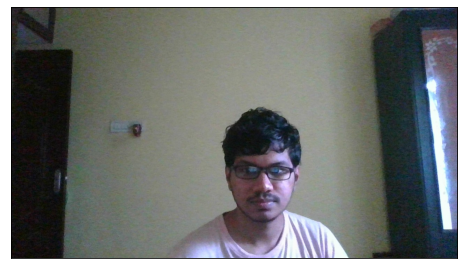

In [51]:
show_image(person)

In [3]:
img1=cv2.imread("WIN_20211123_07_45_35_Pro.jpg")
cv2.imshow('image',img1)


In [11]:
def face_detection(image):
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray)
    print('Number of faces detected:', len(faces))
        
    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return cv_rgb

In [12]:
face_detection(person)
img1=cv2.imread("WIN_20211123_07_45_35_Pro.jpg")
img2 =cv2.imread("WIN_20211123_08_00_13_Pro.jpg")

Number of faces detected: 1


In [6]:
modelFile ="res10_300x300_ssd_iter_140000_fp16.caffemodel"
configFile = "deploy.prototxt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

In [7]:
def Singleface_Dimesion_Extraction(image,coord=False):
    blob = cv2.dnn.blobFromImage(image, 1,(224,224), [104, 117, 123], False, False)
    conf_threshold=0.8
    frameWidth=image.shape[1] 
    frameHeight=image.shape[0] 
    max_confidence=0
    detections = net.forward()
    detection_index=0
    bboxes = []
    
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            
            if max_confidence < confidence: # only show maximum confidence face
                max_confidence = confidence
                detection_index = i
    i=detection_index        
    x1 = int(detections[0, 0, i, 3] * frameWidth)
    y1 = int(detections[0, 0, i, 4] * frameHeight)
    x2 = int(detections[0, 0, i, 5] * frameWidth)
    y2 = int(detections[0, 0, i, 6] * frameHeight)
    cv2.rectangle(image,(x1,y1),(x2,y2),(255,255,0),2)
    cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if coord==True:
        return x1, y1, x2, y2
    return cv_rgb

In [116]:
a=Singleface_Dimesion_Extraction(img1)
plt.imshow(a)
plt.show() 


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\layers\convolution_layer.cpp:359: error: (-215:Assertion failed) !blobs.empty() || inputs.size() > 1 in function 'cv::dnn::ConvolutionLayerImpl::getMemoryShapes'


In [21]:
imagePath = sys.argv[1]

image = cv2.imread(img1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
)

print("[INFO] Found {0} Faces.".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)

status = cv2.imwrite('faces_detected.jpg', image)
print("[INFO] Image faces_detected.jpg written to filesystem: ", status)


[INFO] Found 1 Faces.
[INFO] Object found. Saving locally.
[INFO] Image faces_detected.jpg written to filesystem:  True


In [114]:

file_name='lfw-funneled.tgz'
def jpg_files(members): #only extract jpg files
    for tarinfo in members:
        if os.path.splitext(tarinfo.name)[1] == ".jpg":
            yield tarinfo
def untar(fname,path="LFW"): #untarring the archive
    tar = tarfile.open(fname)
    tar.extractall(path,members=jpg_files(tar))
    tar.close()
    if path is "":
        print("File Extracted in Current Directory")
    else:
        print("File Extracted in to",  path)

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-114-bb7fe9031129>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if path is "":


In [115]:
untar(file_name,"LFW")

File Extracted in to LFW


In [121]:
os.listdir('LFW/lfw_funneled/')

['Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abbas_Kiarostami',
 'Abba_Eban',
 'Abdel_Aziz_Al-Hakim',
 'Abdel_Madi_Shabneh',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Nasseef',
 'Abdullatif_Sener',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Rahman',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abner_Martinez',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Rich',
 'Adam_Sandler',
 'Adam_Scott',
 'Adelina_Avila',
 'Adel_Al-Jubeir',
 'Adisai_Bodharamik',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adoor_Gopalakarishnan',
 'Adriana_Lima',
 'Adriana_Perez_Navarro',
 'Adrianna_Zuzic',
 'Adrian_Annus',
 'Adrian_Fernandez',
 'Adrian_McPherson',
 'Adrian_Murrell',
 'Adrian_Nastase',
 'Adrien_Brody',
 'Afton_S

In [125]:
total = sum([len(files) for r, d, files in os.walk('LFW/lfw_funneled/')])
total 

NameError: name 'd' is not defined